# SPARQL Basart

<font size="4">While retrieving the participants to an exhibition and their photo can be useful, most probably we would like to do something more with it. Using the same methods we can look at the The International Surrealist Exhibition of 1936 more in details</font>

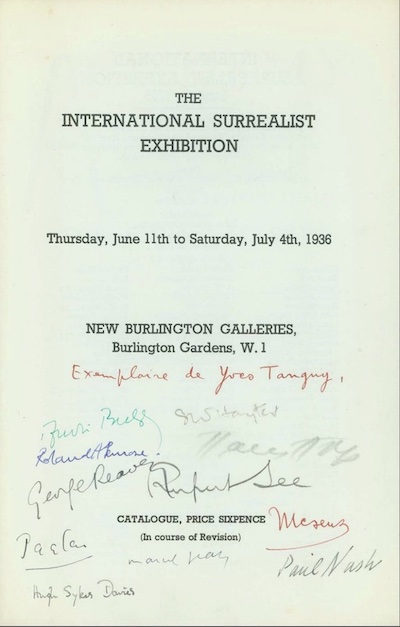

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium
import VizKG.visualize as vkg
import warnings

In [2]:
endpoint = "http://localhost:3030/Basart/sparql"

<br><font size="4">We can continue to focus on The International Surrealist Exhibition. Given this exhibition we use SPARQL to select the date of the exhibition, all the participants and which artwork has been presented. Moreover, we can cross this information with wikidata, retrieving for each artist, its place of birth, as well as the coordinates of its place of birth, quite useful to map this information.</font>

<br>

#### SPARQL

In [3]:
q ="""

PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX aat: <http://vocab.getty.edu/aat/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>


SELECT ?exhibitionLabel ?place ?begin ?artworkLabel ?actorlabel ?placeBirthLabel ?coordinates ?countryLabel WHERE { 

VALUES ?exhibition {<https://visualcontagions.unige.ch/resources/exhibition/18442> }
  
?exhibition a crm:E7_Activity ;
  	crm:P7_took_place_at ?place ;
  	rdfs:label ?exhibitionLabel ;
   crm:P4_has_time-span ?time .
   
  ?time crm:P82a_begin_of_the_begin ?begin .
  
 ?artwork crm:P16i_was_used_for ?exhibition ;
          crm:P108i_was_produced_by ?production ;
          rdfs:label ?artworkLabel .
  ?production crm:P14_carried_out_by ?actor .
  
  ?actor rdfs:label ?actorlabel ;
         <http://www.ics.forth.gr/isl/CRMext/CRMdig.rdfs/L54_is_same-as> ?wd .
         
SERVICE <https://query.wikidata.org/sparql> {
	?wd wdt:P19 ?placeBirth .
    ?placeBirth rdfs:label ?placeBirthLabel ;
                wdt:P17 ?country ;
                wdt:P625 ?coordinates .
    ?country rdfs:label ?countryLabel .
	FILTER (lang(?placeBirthLabel) = 'en')
    FILTER (lang(?countryLabel) = 'en')
	}

}
"""

In [4]:
df_surrelist = sparql_dataframe.get(endpoint, q)

In [5]:
df_surrelist

,exhibitionLabel,place,begin,artworkLabel,actorlabel,placeBirthLabel,coordinates,countryLabel
0,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,Objects,Yves Tanguy,Paris,Point(2.352222222 48.856666666),France
1,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,Objects,Yves Tanguy,8th arrondissement of Paris,Point(2.311111111 48.874166666),France
2,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,Object,Joan Miro,Barcelona,Point(2.176944444 41.3825),Spain
3,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,Bird Monument,Max Ernst,Brühl,Point(6.9 50.833333333),Germany
4,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,Meditation,Paul Klee,Münchenbuchsee,Point(7.45 47.016388888),Switzerland
...,...,...,...,...,...,...,...,...
168,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,The Family is the Origin of the Family,Max Ernst,Brühl,Point(6.9 50.833333333),Germany
169,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,The Light of Coincidences,René Magritte,Lessines,Point(3.83 50.7117),Belgium
170,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,The Prophet,Giorgio De Chirico,Volos,Point(22.9425 39.361111111),Greece
171,The International Surrealist Exhibition,https://visualcontagions.unige.ch/resources/ci...,1936-06-11T00:00:00,"""Le Crayon qui Parle""",Pablo Picasso,Málaga,Point(-4.416666666 36.716666666),Spain


In [6]:
df_surrelist.to_csv("/Users/carboni/Downloads/surrealist.csv", index=False)

<br>
<font size="4">Thanks to SPARQL and the capabilities to interconnect with other SPARQL endpoint in a programmatic fashion, we enrich our initial corpus, and we can take a look more in details about the participants of the exhibition. An easy way to do so, is to analyse the provenance of the artists</font>

<br>

<AxesSubplot: >

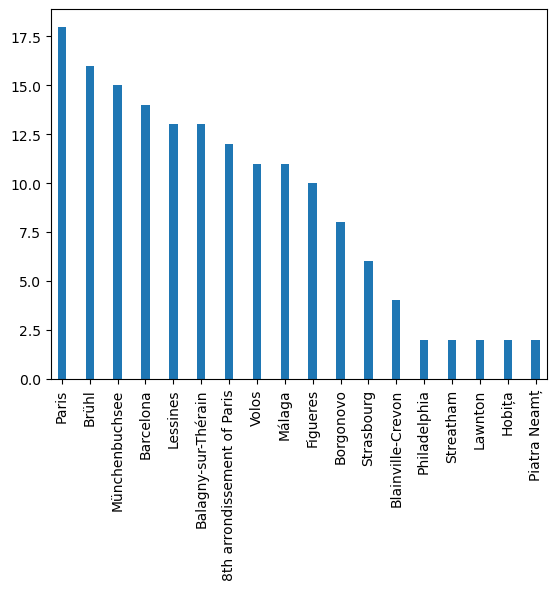

In [11]:
df_surrelist['placeBirthLabel'].value_counts().plot(kind='bar', color='C0', width=0.3)

<AxesSubplot: >

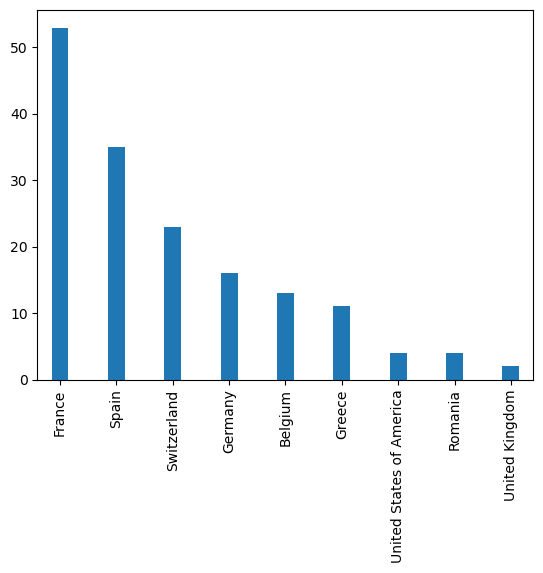

In [12]:
df_surrelist['countryLabel'].value_counts().plot(kind='bar', color='C0', width=0.3)

<br>

<font size="4">Thanks to a quick quantitative analysis of the cities and country of each artist, we can clearly notice the strong presence of french, as usual represented by its capital, Paris. Most probably a better way to see this data is to use the coordinates retrieved from Wikidata to project the information in a map. </font> 

<br>

In [13]:
df_surrelist['geometry'] = df_surrelist.coordinates.apply(wkt.loads)
df_surrelist.drop('coordinates', axis=1, inplace=True)
gdf = gpd.GeoDataFrame(df_surrelist, geometry='geometry')

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

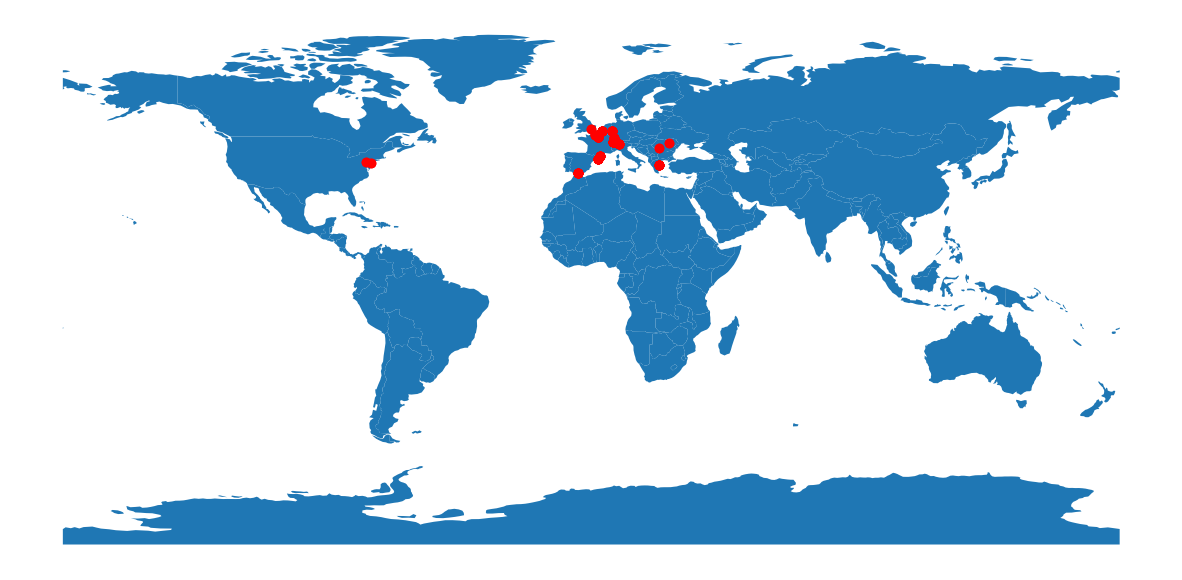

In [17]:
ax = world[world.continent != 'Antartica'].plot(
    figsize=(15, 15))
gdf.plot(ax=ax, color='red').set_axis_off()
plt.show()

In [16]:
gdf['lon'] = gdf['geometry'].x
gdf['lat'] = gdf['geometry'].y

In [18]:
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]

In [19]:
map = folium.Map(tiles="OpenStreetMap", zoom_start=3)
i = 0
for coordinates in geo_df_list:
    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup=
                "Artwork: " + str(gdf.artworkLabel[i]) + "<br>"
                + "Artist: " + str(gdf.actorlabel[i]),
        )
    )
    i = i + 1

In [20]:
map